# Using Metadensity in Jupter notebooks
This notebook showcases SF3B4, U2 density around branchpoints

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/projects/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/projects/Metadensity/scripts')

plt.style.use('seaborn-white')

please set the right config according to genome coordinate
Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## load RBPs into eCLIP object

In [2]:
# download this thing from https://www.dropbox.com/s/cgkeuqr0cjif558/test_data.tar.gz
menifest = pd.read_csv('/home/hsher/projects/Metadensity/test_data/menifest.csv')

In [5]:
menifest.loc[(menifest['RBP'] == 'SF3B4')].iloc[0]

Unnamed: 0                                                         0
bam_0              /home/hsher/projects/Metadensity/test_data/pro...
bam_control_0      /home/hsher/projects/Metadensity/test_data/pro...
minus_0            /home/hsher/projects/Metadensity/test_data/cov...
minus_control_0    /home/hsher/projects/Metadensity/test_data/cov...
plus_0             /home/hsher/projects/Metadensity/test_data/cov...
plus_control_0     /home/hsher/projects/Metadensity/test_data/cov...
bed_0              /home/hsher/projects/Metadensity/test_data/SF3...
uid                                                       SF3B4_test
RBP                                                            SF3B4
Name: 0, dtype: object

In [3]:
SF3B4 = eCLIP.from_series(menifest.loc[(menifest['RBP'] == 'SF3B4')].iloc[0],
                          single_end = False)

In [4]:
clips = [SF3B4]

# Calculate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

In [5]:
# here for the set of transcript, we use the IDR peak containing transcript assuming they have good signal
def build_idr_metadensity(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metadensity(eCLIP, eCLIP.name,background_method = 'relative information', normalize = False)
    m.get_density_array()
    return m
def build_idr_metatruncate(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metatruncate(eCLIP, eCLIP.name,background_method = 'relative information', normalize = False)
    m.get_density_array(use_truncation = True)
    return m

In [6]:
# this step takes some time for building metagene from the annotation files.
den = [build_idr_metadensity(e) for e in clips]
trun = [build_idr_metatruncate(e) for e in clips]

Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


need at least one array to concatenate
Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


need at least one array to concatenate


## Visualize RBP map: individual density per transcript

use `feature_to_show` to decide what features to show. 

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/plotd.py:187: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


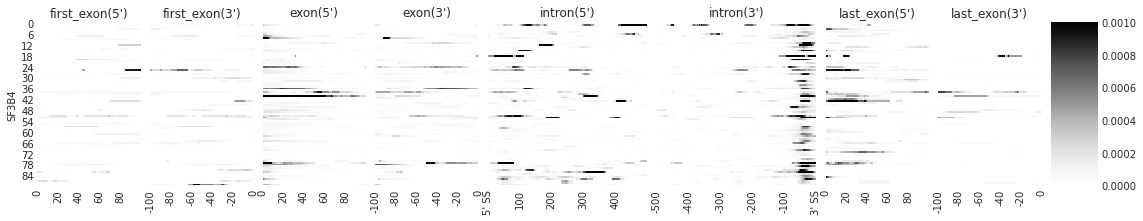

In [7]:
### PLOT INDIVIDUAL DENSITY
# you can customize the list of features you want to show. This is suitable when you are looking for splicing
f = plot_rbp_map(den, features_to_show = generic_rna)

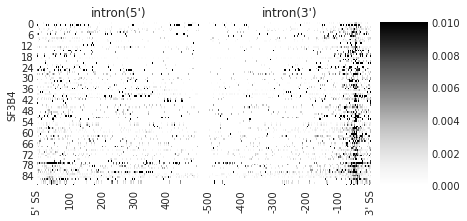

In [8]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = ['intron'], cmap = 'Greys', ymax = 0.01)
f.savefig('SF3B4_rnamap.svg', dpi = 300)

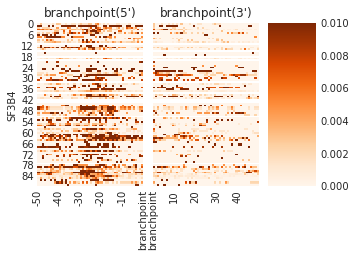

In [9]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = ['branchpoint'], ymax = 0.01, cmap = 'Oranges')
f.savefig('SF3B4_brmap.svg', dpi = 300)

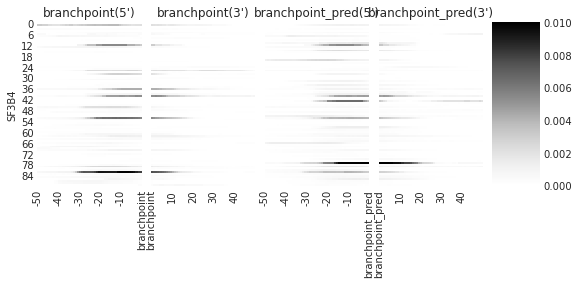

In [10]:
### PLOT INDIVIDUAL DENSITY SITES
f = plot_rbp_map(den, features_to_show = branchpoints, ymax = 0.01)

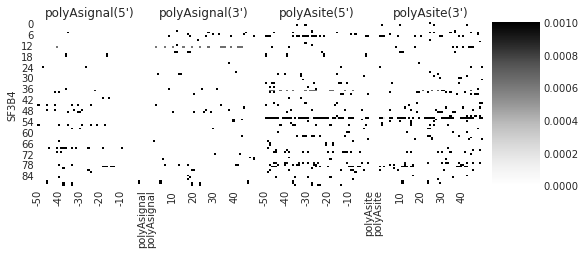

In [11]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = polyAs, ymax = 0.001)

# Median and Mean density

In [12]:
color_dict = {'SF3B4': 'royalblue', 'SF3A3':'mediumorchid', 'U2AF1':'tomato'}

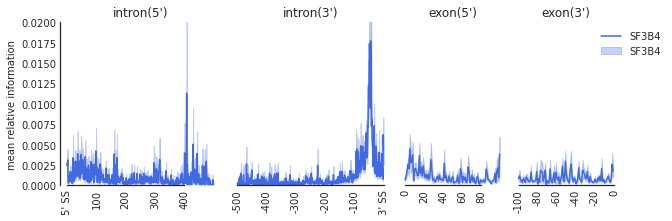

In [13]:
f=plot_mean_density(trun,
                    features_to_show = ['intron', 'exon'], ymax = 0.02,
                   color_dict = color_dict)
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')
f.savefig('SF3B4_rna.svg', dpi = 300)

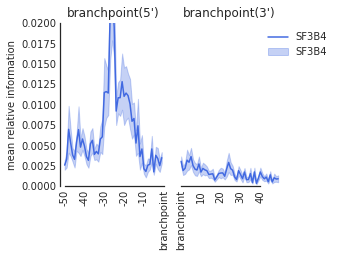

In [14]:

f=plot_mean_density(trun,
                    features_to_show = ['branchpoint'], ymax = 0.02,
                   color_dict = color_dict)
f.get_axes()[0].set_ylabel('mean relative information')
f=beautify(f, offset = 0) # sns.despine 
f.savefig('SF3B4_br.svg', dpi = 300)